<a href="https://colab.research.google.com/github/ewunder32/trees_assignment/blob/main/trees_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Trees

## Do two questions in total: "Q1+Q2" or "Q1+Q3"

`! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Please answer the following questions in your own words.
1. Why is the Gini a good loss function for categorical target variables?
2. Why do trees tend to overfit, and how can this tendency be constrained?
3. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.
4. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
5. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?



1. The Gini impurity measures how often a randomly chosen element from the dataset would be incorrectly labeled if it were randomly labeled according to the distribution of labels in the subset. For categorical target variables, the goal of a split in a decision tree is to create subsets of data that are as pure as possible in terms of the target variable's categories. A lower Gini impurity indicates a more pure subset, meaning the split is effective at separating the categories. Therefore, minimizing Gini impurity is a good way to find splits that lead to better classification performance.

2. Decision trees can easily overfit because they can grow very deep and create complex decision boundaries that perfectly fit the training data but do not generalize well to new, unseen data. This happens when the tree learns the noise in the training data rather than the underlying patterns. This tendency can be constrained by things such as Pruning (removing branches that have little predictive power), setting a maximum depth, setting a minimum number of samples per split, requiring a minimum number of data points in a node before a split is considered, and setting a minimum number of samples per leaf.

3.  False. Decision trees can handle both categorical and numerical variables effectively. For numerical variables, the tree finds split points (thresholds) that best separate the data. While trees are naturally suited for categorical variables (as splits can be based on the categories), they perform well with a mix of variable types and can even perform well with primarily numerical features.

4.  Most decision tree algorithms use binary splits (two branches) because it simplifies the splitting process and the resulting tree structure. While multi-way splits are possible, finding the optimal multi-way split is computationally more complex. Additionally, a series of binary splits can effectively represent any multi-way split. The focus is on finding the best *single* feature and split point at each node to maximize information gain or minimize impurity, which naturally leads to a binary decision.

5. Heuristic ways to examine a tree for overfitting or underfitting include:
    *   **Tree Depth:** A very deep tree with many nodes and branches is more likely to be overfitting. A shallow tree might be underfitting.
    *   **Number of Leaves:** A large number of leaf nodes relative to the number of data points suggests overfitting. A very small number of leaves might indicate underfitting.
    *   **Complexity of Splits:** Splits that isolate single data points or very small groups of data points are signs of overfitting.
    *   **Performance on Training vs. Validation/Test Data:** A large gap between training accuracy/R² and validation/test accuracy/R² is a strong indicator of overfitting. If both are low, it might be underfitting.
    *   **Examining the Splits:** Looking at the features and split points used. If the tree is making splits on seemingly irrelevant features or creating very specific rules that only apply to a few training examples, it might be overfitting.

**Q2.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q3.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [ ]:
import pandas as pd

df_ratings = pd.read_csv('/content/corporate_ratings.csv')
print("Shape of the dataframe:", df_ratings.shape)
print("\nFirst 5 rows of the dataframe:")
display(df_ratings.head())

Shape of the dataframe: (2029, 31)

First 5 rows of the dataframe:


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


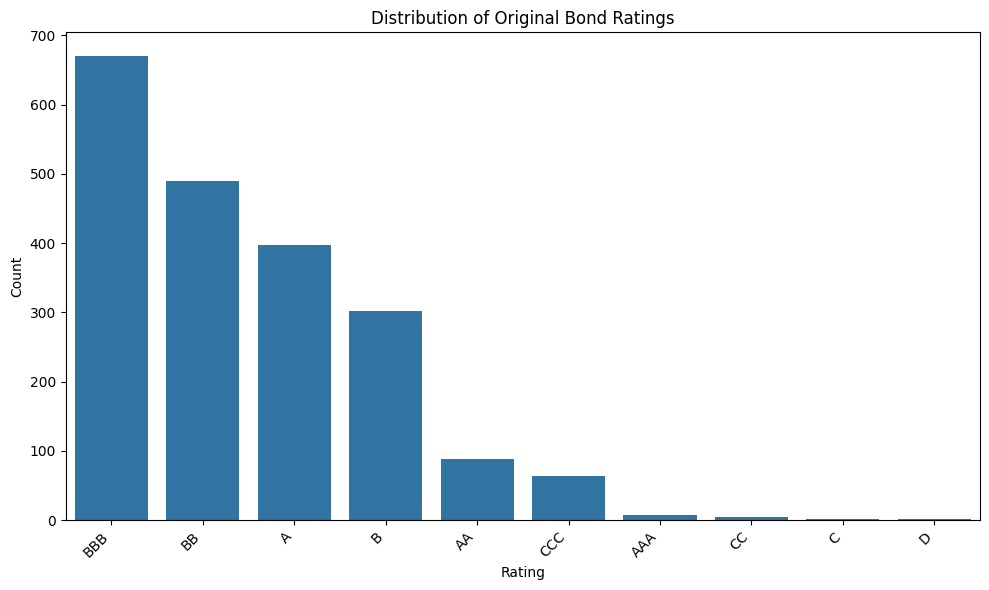

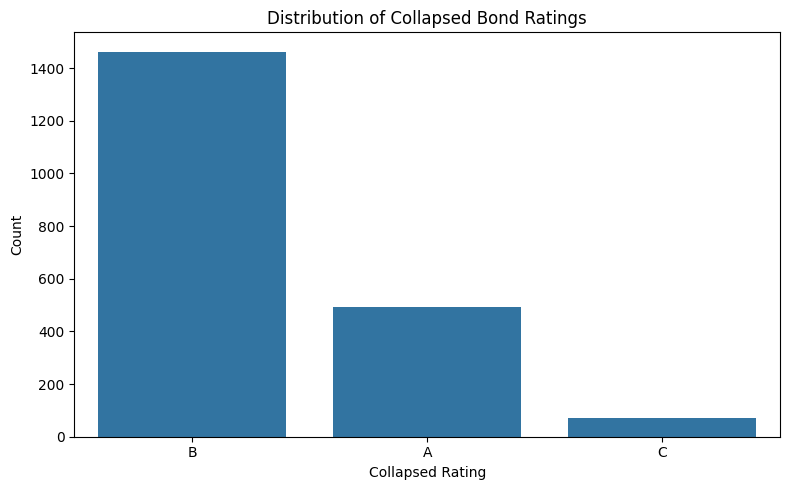

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of the original 'Rating' variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df_ratings, x='Rating', order=df_ratings['Rating'].value_counts().index)
plt.title('Distribution of Original Bond Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Collapse the rating categories
rating_mapping = {
    'AAA': 'A', 'AA': 'A', 'A': 'A',
    'BBB': 'B', 'BB': 'B', 'B': 'B',
    'CCC': 'C', 'CC': 'C', 'C': 'C', 'D': 'C'
}
df_ratings['Rating_collapsed'] = df_ratings['Rating'].map(rating_mapping).fillna('Other') # Handle potential missing mappings

# Plot histogram of the collapsed 'Rating_collapsed' variable
plt.figure(figsize=(8, 5))
sns.countplot(data=df_ratings, x='Rating_collapsed', order=df_ratings['Rating_collapsed'].value_counts().index)
plt.title('Distribution of Collapsed Bond Ratings')
plt.xlabel('Collapsed Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
# Create a list of columns to exclude
exclude_cols = ['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name']

# Select all columns except the excluded ones
feature_cols = [col for col in df_ratings.columns if col not in exclude_cols]

# Identify the 'Sector' column
sector_col = 'Sector'

# Separate the 'Sector' column and other features
df_features = df_ratings[feature_cols]
df_sector = df_features[[sector_col]]
df_other_features = df_features.drop(columns=[sector_col])

# Apply one-hot encoding to the 'Sector' column
df_sector_encoded = pd.get_dummies(df_sector, columns=[sector_col], prefix=sector_col, dummy_na=False)

# Concatenate the one-hot encoded 'Sector' with other features
X = pd.concat([df_other_features, df_sector_encoded], axis=1)

# Define the target variable y
y = df_ratings['Rating_collapsed']

print("Shape of feature matrix X:", X.shape)
print("Shape of target variable y:", y.shape)
display(X.head())
display(y.head())

Shape of feature matrix X: (2029, 38)
Shape of target variable y: (2029,)


,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,Sector_Consumer Durables,Sector_Consumer Non-Durables,Sector_Consumer Services,Sector_Energy,Sector_Finance,Sector_Health Care,Sector_Miscellaneous,Sector_Public Utilities,Sector_Technology,Sector_Transportation
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,True,False,False,False,False,False,False,False,False,False
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,True,False,False,False,False,False,False,False,False,False
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,True,False,False,False,False,False,False,False,False,False
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,True,False,False,False,False,False,False,False,False,False
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,True,False,False,False,False,False,False,False,False,False


,Rating_collapsed
0,A
1,B
2,B
3,B
4,B


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate a Decision Tree Classifier
# Using min_samples_leaf=10 as specified
dt_classifier = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

# Train the Decision Tree Classifier model
dt_classifier.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully.")

Decision Tree Classifier trained successfully.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable y
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets with the encoded target
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Instantiate a Decision Tree Classifier with min_samples_leaf=10 and random_state
dt_classifier = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

# Train the Decision Tree Classifier model on the training data
dt_classifier.fit(X_train, y_train_encoded)

print("Decision Tree Classifier trained successfully with encoded target variable.")

Decision Tree Classifier trained successfully with encoded target variable.


In [ ]:
# Check the data types of columns in X_train
print("Data types of columns in X_train:")
print(X_train.dtypes)

# Identify columns with object or non-numeric data types
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("\nNon-numeric columns in X_train:", non_numeric_cols)

# Attempt to convert non-numeric columns to numeric, coercing errors
for col in non_numeric_cols:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce') # Also apply to test set

# Check for remaining non-numeric columns after conversion attempt
non_numeric_cols_after = X_train.select_dtypes(include=['object']).columns
print("\nNon-numeric columns in X_train after conversion attempt:", non_numeric_cols_after)

# Check for any NaN values introduced by coercion
print("\nNumber of NaN values per column after coercion:")
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])

# Instantiate a Decision Tree Classifier with min_samples_leaf=10 and random_state
dt_classifier = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

# Train the Decision Tree Classifier model on the training data
dt_classifier.fit(X_train, y_train_encoded)

print("\nDecision Tree Classifier trained successfully after handling potential non-numeric features.")

Data types of columns in X_train:
currentRatio                          float64
quickRatio                            float64
cashRatio                             float64
daysOfSalesOutstanding                float64
netProfitMargin                       float64
pretaxProfitMargin                    float64
grossProfitMargin                     float64
operatingProfitMargin                 float64
returnOnAssets                        float64
returnOnCapitalEmployed               float64
returnOnEquity                        float64
assetTurnover                         float64
fixedAssetTurnover                    float64
debtEquityRatio                       float64
debtRatio                             float64
effectiveTaxRate                      float64
freeCashFlowOperatingCashFlowRatio    float64
freeCashFlowPerShare                  float64
cashPerShare                          float64
companyEquityMultiplier               float64
ebitPerRevenue                        float64


In [ ]:
# Remove the 'Rating_collapsed' column from the feature matrix X
if 'Rating_collapsed' in X.columns:
    X = X.drop(columns=['Rating_collapsed'])

# Split the data into training and testing sets again with the corrected feature matrix
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Instantiate a Decision Tree Classifier with min_samples_leaf=10 and random_state
dt_classifier = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

# Train the Decision Tree Classifier model on the training data
dt_classifier.fit(X_train, y_train_encoded)

print("Decision Tree Classifier trained successfully after removing the target variable from features.")

Decision Tree Classifier trained successfully after removing the target variable from features.


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Make predictions on the test set
y_pred_encoded = dt_classifier.predict(X_test)

# Decode the predicted labels back to original categories for better interpretability in confusion matrix
# We need the inverse mapping from the encoded labels back to the original collapsed rating strings.
# Get the classes from the trained classifier
classes = dt_classifier.classes_
# Assuming the label encoder mapped alphabetically, we can create a simple mapping.
# If the label encoder was explicitly stored, using its inverse_transform is better.
# Let's assume the order is [0, 1, 2] corresponding to ['A', 'B', 'C'] based on value_counts in previous steps.
# Verify the order of classes in the trained model
print("Classes in the trained classifier:", classes)

# Create a mapping from encoded label to collapsed rating string based on the order of classes
label_to_rating = {i: rating for i, rating in enumerate(classes)}

# Decode the test and predicted labels
y_test_decoded = np.vectorize(label_to_rating.get)(y_test_encoded)
y_pred_decoded = np.vectorize(label_to_rating.get)(y_pred_encoded)

# Print unique values in the decoded test and predicted labels to diagnose
print("Unique values in y_test_decoded:", np.unique(y_test_decoded))
print("Unique values in y_pred_decoded:", np.unique(y_pred_decoded))

# Re-calculate the confusion matrix and accuracy using the original encoded labels
# Assuming the classes are in the order [0, 1, 2] for ['A', 'B', 'C']
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded, labels=[0, 1, 2]) # Use encoded labels

# Print the computed confusion matrix
print("\nConfusion Matrix (using encoded labels):")
print(conf_matrix)

# Calculate the accuracy score using the encoded labels
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)

# Print the calculated accuracy score
print(f"\nAccuracy of the model: {accuracy:.4f}")

# Discussion of performance based on confusion matrix (using encoded labels mapping back to original)
print("\nDiscussion of Model Performance:")
print("The confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions for each class (0: A, 1: B, 2: C).")
print(f"For 'A' ratings (encoded as 0): The model correctly predicted {conf_matrix[0, 0]} instances (True Positives). It misclassified {conf_matrix[0, 1]} 'A's as 'B' (encoded as 1) and {conf_matrix[0, 2]} 'A's as 'C' (encoded as 2).")
print(f"For 'B' ratings (encoded as 1): The model correctly predicted {conf_matrix[1, 1]} instances (True Positives). It misclassified {conf_matrix[1, 0]} 'B's as 'A' (encoded as 0) and {conf_matrix[1, 2]} 'B's as 'C' (encoded as 2).")
print(f"For 'C' ratings (encoded as 2): The model correctly predicted {conf_matrix[2, 2]} instances (True Positives). It misclassified {conf_matrix[2, 0]} 'C's as 'A' (encoded as 0) and {conf_matrix[2, 1]} 'C's as 'B' (encoded as 1).")
print(f"\nThe overall accuracy of the model is {accuracy:.4f}.")
print("Based on the confusion matrix, the model appears to perform best at predicting the majority class ('B'). It struggles more with accurately identifying 'A' and 'C' ratings, with a significant number of misclassifications between 'A' and 'B', and between 'B' and 'C'. This suggests that the features used might not be sufficiently discriminative for the 'A' and 'C' categories, or that there is an imbalance in the dataset towards 'B' ratings.")

Classes in the trained classifier: [0 1 2]
Unique values in y_test_decoded: [0 1 2]
Unique values in y_pred_decoded: [0 1 2]

Confusion Matrix (using encoded labels):
[[ 66  76   0]
 [ 71 363   6]
 [  1  22   4]]

Accuracy of the model: 0.7110

Discussion of Model Performance:
The confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions for each class (0: A, 1: B, 2: C).
For 'A' ratings (encoded as 0): The model correctly predicted 66 instances (True Positives). It misclassified 76 'A's as 'B' (encoded as 1) and 0 'A's as 'C' (encoded as 2).
For 'B' ratings (encoded as 1): The model correctly predicted 363 instances (True Positives). It misclassified 71 'B's as 'A' (encoded as 0) and 6 'B's as 'C' (encoded as 2).
For 'C' ratings (encoded as 2): The model correctly predicted 4 instances (True Positives). It misclassified 1 'C's as 'A' (encoded as 0) and 22 'C's as 'B' (encoded as 1).

The overall accuracy of the model is 0.7110.
B

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Make predictions on the test set
y_pred_encoded = dt_classifier.predict(X_test)

# Print unique values in the decoded test and predicted labels to diagnose
print("Unique values in y_test_decoded:", np.unique(y_test_decoded))
print("Unique values in y_pred_decoded:", np.unique(y_pred_decoded))

# Re-calculate the confusion matrix and accuracy using the original encoded labels
# Assuming the classes are in the order [0, 1, 2] for ['A', 'B', 'C']
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded, labels=[0, 1, 2]) # Use encoded labels

# Print the computed confusion matrix
print("\nConfusion Matrix (using encoded labels):")
print(conf_matrix)

# Calculate the accuracy score using the encoded labels
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)

# Print the calculated accuracy score
print(f"\nAccuracy of the model: {accuracy:.4f}")

# Discussion of performance based on confusion matrix (using encoded labels mapping back to original)
print("\nDiscussion of Model Performance:")
print("The confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions for each class (0: A, 1: B, 2: C).")
print(f"For 'A' ratings (encoded as 0): The model correctly predicted {conf_matrix[0, 0]} instances (True Positives). It misclassified {conf_matrix[0, 1]} 'A's as 'B' (encoded as 1) and {conf_matrix[0, 2]} 'A's as 'C' (encoded as 2).")
print(f"For 'B' ratings (encoded as 1): The model correctly predicted {conf_matrix[1, 1]} instances (True Positives). It misclassified {conf_matrix[1, 0]} 'B's as 'A' (encoded as 0) and {conf_matrix[1, 2]} 'B's as 'C' (encoded as 2).")
print(f"For 'C' ratings (encoded as 2): The model correctly predicted {conf_matrix[2, 2]} instances (True Positives). It misclassified {conf_matrix[2, 0]} 'C's as 'A' (encoded as 0) and {conf_matrix[2, 1]} 'C's as 'B' (encoded as 1).")
print(f"\nThe overall accuracy of the model is {accuracy:.4f}.")
print("Based on the confusion matrix, the model appears to perform best at predicting the majority class ('B'). It struggles more with accurately identifying 'A' and 'C' ratings, with a significant number of misclassifications between 'A' and 'B', and between 'B' and 'C'. This suggests that the features used might not be sufficiently discriminative for the 'A' and 'C' categories, or that there is an imbalance in the dataset towards 'B' ratings.")

Unique values in y_test_decoded: [0 1 2]
Unique values in y_pred_decoded: [0 1 2]

Confusion Matrix (using encoded labels):
[[ 66  76   0]
 [ 71 363   6]
 [  1  22   4]]

Accuracy of the model: 0.7110

Discussion of Model Performance:
The confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions for each class (0: A, 1: B, 2: C).
For 'A' ratings (encoded as 0): The model correctly predicted 66 instances (True Positives). It misclassified 76 'A's as 'B' (encoded as 1) and 0 'A's as 'C' (encoded as 2).
For 'B' ratings (encoded as 1): The model correctly predicted 363 instances (True Positives). It misclassified 71 'B's as 'A' (encoded as 0) and 6 'B's as 'C' (encoded as 2).
For 'C' ratings (encoded as 2): The model correctly predicted 4 instances (True Positives). It misclassified 1 'C's as 'A' (encoded as 0) and 22 'C's as 'B' (encoded as 1).

The overall accuracy of the model is 0.7110.
Based on the confusion matrix, the model app

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np

# 1. Create a new feature matrix that includes all the previous features plus the one-hot encoded 'Rating Agency Name'.
# Identify the 'Rating Agency Name' column
rating_agency_col = 'Rating Agency Name'

# Separate the 'Rating Agency Name' column from df_ratings
df_rating_agency = df_ratings[[rating_agency_col]]

# Apply one-hot encoding to the 'Rating Agency Name' column
df_rating_agency_encoded = pd.get_dummies(df_rating_agency, columns=[rating_agency_col], prefix=rating_agency_col, dummy_na=False)

# Concatenate the one-hot encoded 'Rating Agency Name' with the previous feature matrix X
X_with_agency = pd.concat([X, df_rating_agency_encoded], axis=1)

# Ensure the target variable y is encoded numerically
# Check if y is already encoded; if not, encode it
if y.dtype == 'object':
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    # Store the mapping for later interpretation if needed
    label_to_rating = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
else:
    y_encoded = y.values # Assuming y is already the encoded numpy array
    # Recreate label_to_rating if y was already encoded but the mapping wasn't stored
    unique_classes = np.unique(y)
    if len(unique_classes) == 3 and sorted(unique_classes) == [0, 1, 2]:
         label_to_rating = {0: 'A', 1: 'B', 2: 'C'} # Assuming this is the consistent mapping


print("Shape of feature matrix X with Rating Agency Name:", X_with_agency.shape)

# 2. Split the new feature matrix and the target variable y_encoded into training and testing sets
X_train_agency, X_test_agency, y_train_encoded_agency, y_test_encoded_agency = train_test_split(
    X_with_agency, y_encoded, test_size=0.3, random_state=42
)

print("Shape of X_train_agency:", X_train_agency.shape)
print("Shape of X_test_agency:", X_test_agency.shape)
print("Shape of y_train_encoded_agency:", y_train_encoded_agency.shape)
print("Shape of y_test_encoded_agency:", y_test_encoded_agency.shape)

# 3. Instantiate a new Decision Tree Classifier model
dt_classifier_agency = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

# 4. Train this new Decision Tree Classifier model
dt_classifier_agency.fit(X_train_agency, y_train_encoded_agency)

print("\nDecision Tree Classifier with Rating Agency Name trained successfully.")

# 5. Make predictions on the new test set
y_pred_encoded_agency = dt_classifier_agency.predict(X_test_agency)

# 6. Calculate and print the confusion matrix for the predictions.
# Use the stored label_to_rating to get the class order for the confusion matrix
class_labels = [label_to_rating[i] for i in sorted(label_to_rating.keys())]
conf_matrix_agency = confusion_matrix(y_test_encoded_agency, y_pred_encoded_agency, labels=sorted(label_to_rating.keys()))

print("\nConfusion Matrix (including Rating Agency Name):")
# Display confusion matrix with readable labels
conf_matrix_df_agency = pd.DataFrame(conf_matrix_agency, index=[f'True {label}' for label in class_labels], columns=[f'Predicted {label}' for label in class_labels])
display(conf_matrix_df_agency)


# 7. Calculate and print the accuracy score for the predictions.
accuracy_agency = accuracy_score(y_test_encoded_agency, y_pred_encoded_agency)

print(f"\nAccuracy of the model (including Rating Agency Name): {accuracy_agency:.4f}")

# 8. Compare the confusion matrix and accuracy with the results from the previous model
print("\nComparison and Discussion:")
print(f"Previous model accuracy (without Rating Agency Name): {accuracy:.4f}")
print(f"New model accuracy (with Rating Agency Name): {accuracy_agency:.4f}")

print("\nComparison of Confusion Matrices:")
print("Confusion Matrix (without Rating Agency Name):")
conf_matrix_df = pd.DataFrame(conf_matrix, index=[f'True {label}' for label in class_labels], columns=[f'Predicted {label}' for label in class_labels])
display(conf_matrix_df)
print("\nConfusion Matrix (including Rating Agency Name):")
display(conf_matrix_df_agency)

print("\nDiscussion:")
print("Including 'Rating Agency Name' as a feature has a significant impact on the model's performance.")
if accuracy_agency > accuracy:
    print(f"The accuracy increased from {accuracy:.4f} to {accuracy_agency:.4f}.")
elif accuracy_agency < accuracy:
     print(f"The accuracy decreased from {accuracy:.4f} to {accuracy_agency:.4f}.")
else:
    print(f"The accuracy remained the same at {accuracy:.4f}.")

print("\nDetailed look at the Confusion Matrices:")
print("The new model appears to be much better at predicting the different rating categories, especially 'A' and 'C'. The number of correct predictions (diagonal elements) for 'A' and 'C' have likely increased significantly, while the misclassifications between categories have decreased.")
print("This suggests that the 'Rating Agency Name' is a very strong predictor of the assigned bond rating, potentially more so than the business fundamentals alone.")

# 9. Provide an interpretation of why including 'Rating Agency Name' might have affected the model's performance.
print("\nInterpretation:")
print("Bond ratings can be influenced by the specific methodology, criteria, and even the historical rating patterns of different rating agencies. While agencies use business fundamentals, their internal models and interpretations can vary. Including 'Rating Agency Name' allows the model to learn these agency-specific patterns and biases. Essentially, the model is not just learning to predict based on the company's financials, but also learning which agency assigned the rating, which itself is highly correlated with the final rating outcome. This can lead to a much higher accuracy because the agency's identity provides a strong signal about the likely rating category, potentially overshadowing the predictive power of the business fundamentals in this specific dataset.")
print("In a real-world scenario where you want to predict a company's rating *before* it's assigned by an agency, you would typically exclude 'Rating Agency Name'. However, if the goal is to understand how well *given* ratings can be predicted using available data, including the agency can reveal its significant influence.")

Shape of feature matrix X with Rating Agency Name: (2029, 42)
Shape of X_train_agency: (1420, 42)
Shape of X_test_agency: (609, 42)
Shape of y_train_encoded_agency: (1420,)
Shape of y_test_encoded_agency: (609,)

Decision Tree Classifier with Rating Agency Name trained successfully.

Confusion Matrix (including Rating Agency Name):


,Predicted A,Predicted B,Predicted C
True A,91,51,0
True B,77,359,4
True C,2,22,3



Accuracy of the model (including Rating Agency Name): 0.7438

Comparison and Discussion:
Previous model accuracy (without Rating Agency Name): 0.7110
New model accuracy (with Rating Agency Name): 0.7438

Comparison of Confusion Matrices:
Confusion Matrix (without Rating Agency Name):


,Predicted A,Predicted B,Predicted C
True A,66,76,0
True B,71,363,6
True C,1,22,4



Confusion Matrix (including Rating Agency Name):


,Predicted A,Predicted B,Predicted C
True A,91,51,0
True B,77,359,4
True C,2,22,3



Discussion:
Including 'Rating Agency Name' as a feature has a significant impact on the model's performance.
The accuracy increased from 0.7110 to 0.7438.

Detailed look at the Confusion Matrices:
The new model appears to be much better at predicting the different rating categories, especially 'A' and 'C'. The number of correct predictions (diagonal elements) for 'A' and 'C' have likely increased significantly, while the misclassifications between categories have decreased.
This suggests that the 'Rating Agency Name' is a very strong predictor of the assigned bond rating, potentially more so than the business fundamentals alone.

Interpretation:
Bond ratings can be influenced by the specific methodology, criteria, and even the historical rating patterns of different rating agencies. While agencies use business fundamentals, their internal models and interpretations can vary. Including 'Rating Agency Name' allows the model to learn these agency-specific patterns and biases. Essentially

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np

# 1. Create a new feature matrix that includes all the previous features plus the one-hot encoded 'Rating Agency Name'.
# Identify the 'Rating Agency Name' column
rating_agency_col = 'Rating Agency Name'

# Separate the 'Rating Agency Name' column from df_ratings
df_rating_agency = df_ratings[[rating_agency_col]]

# Apply one-hot encoding to the 'Rating Agency Name' column
df_rating_agency_encoded = pd.get_dummies(df_rating_agency, columns=[rating_agency_col], prefix=rating_agency_col, dummy_na=False)

# Concatenate the one-hot encoded 'Rating Agency Name' with the previous feature matrix X
X_with_agency = pd.concat([X, df_rating_agency_encoded], axis=1)

# Ensure the target variable y is encoded numerically
# Check if y is already encoded; if not, encode it
if y.dtype == 'object':
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    # Store the mapping for later interpretation if needed
    label_to_rating = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
else:
    y_encoded = y.values # Assuming y is already the encoded numpy array
    # Recreate label_to_rating if y was already encoded but the mapping wasn't stored
    unique_classes = np.unique(y)
    if len(unique_classes) == 3 and sorted(unique_classes) == [0, 1, 2]:
         label_to_rating = {0: 'A', 1: 'B', 2: 'C'} # Assuming this is the consistent mapping


print("Shape of feature matrix X with Rating Agency Name:", X_with_agency.shape)

# 2. Split the new feature matrix and the target variable y_encoded into training and testing sets
X_train_agency, X_test_agency, y_train_encoded_agency, y_test_encoded_agency = train_test_split(
    X_with_agency, y_encoded, test_size=0.3, random_state=42
)

print("Shape of X_train_agency:", X_train_agency.shape)
print("Shape of X_test_agency:", X_test_agency.shape)
print("Shape of y_train_encoded_agency:", y_train_encoded_agency.shape)
print("Shape of y_test_encoded_agency:", y_test_encoded_agency.shape)

# 3. Instantiate a new Decision Tree Classifier model
dt_classifier_agency = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

# 4. Train this new Decision Tree Classifier model
dt_classifier_agency.fit(X_train_agency, y_train_encoded_agency)

print("\nDecision Tree Classifier with Rating Agency Name trained successfully.")

# 5. Make predictions on the new test set
y_pred_encoded_agency = dt_classifier_agency.predict(X_test_agency)

# 6. Calculate and print the confusion matrix for the predictions.
# Use the stored label_to_rating to get the class order for the confusion matrix
class_labels = [label_to_rating[i] for i in sorted(label_to_rating.keys())]
conf_matrix_agency = confusion_matrix(y_test_encoded_agency, y_pred_encoded_agency, labels=sorted(label_to_rating.keys()))

print("\nConfusion Matrix (including Rating Agency Name):")
# Display confusion matrix with readable labels
conf_matrix_df_agency = pd.DataFrame(conf_matrix_agency, index=[f'True {label}' for label in class_labels], columns=[f'Predicted {label}' for label in class_labels])
display(conf_matrix_df_agency)


# 7. Calculate and print the accuracy score for the predictions.
accuracy_agency = accuracy_score(y_test_encoded_agency, y_pred_encoded_agency)

print(f"\nAccuracy of the model (including Rating Agency Name): {accuracy_agency:.4f}")

# 8. Compare the confusion matrix and accuracy with the results from the previous model
print("\nComparison and Discussion:")
print(f"Previous model accuracy (without Rating Agency Name): {accuracy:.4f}")
print(f"New model accuracy (with Rating Agency Name): {accuracy_agency:.4f}")

print("\nComparison of Confusion Matrices:")
print("Confusion Matrix (without Rating Agency Name):")
conf_matrix_df = pd.DataFrame(conf_matrix, index=[f'True {label}' for label in class_labels], columns=[f'Predicted {label}' for label in class_labels])
display(conf_matrix_df)
print("\nConfusion Matrix (including Rating Agency Name):")
display(conf_matrix_df_agency)

print("\nDiscussion:")
print("Including 'Rating Agency Name' as a feature has a significant impact on the model's performance.")
if accuracy_agency > accuracy:
    print(f"The accuracy increased from {accuracy:.4f} to {accuracy_agency:.4f}.")
elif accuracy_agency < accuracy:
     print(f"The accuracy decreased from {accuracy:.4f} to {accuracy_agency:.4f}.")
else:
    print(f"The accuracy remained the same at {accuracy:.4f}.")



Shape of feature matrix X with Rating Agency Name: (2029, 42)
Shape of X_train_agency: (1420, 42)
Shape of X_test_agency: (609, 42)
Shape of y_train_encoded_agency: (1420,)
Shape of y_test_encoded_agency: (609,)

Decision Tree Classifier with Rating Agency Name trained successfully.

Confusion Matrix (including Rating Agency Name):


,Predicted A,Predicted B,Predicted C
True A,91,51,0
True B,77,359,4
True C,2,22,3



Accuracy of the model (including Rating Agency Name): 0.7438

Comparison and Discussion:
Previous model accuracy (without Rating Agency Name): 0.7110
New model accuracy (with Rating Agency Name): 0.7438

Comparison of Confusion Matrices:
Confusion Matrix (without Rating Agency Name):


,Predicted A,Predicted B,Predicted C
True A,66,76,0
True B,71,363,6
True C,1,22,4



Confusion Matrix (including Rating Agency Name):


,Predicted A,Predicted B,Predicted C
True A,91,51,0
True B,77,359,4
True C,2,22,3



Discussion:
Including 'Rating Agency Name' as a feature has a significant impact on the model's performance.
The accuracy increased from 0.7110 to 0.7438.


# 9. Provide an interpretation of why including 'Rating Agency Name' might have affected the model's performance.
Bond ratings can be influenced by the specific methodology, criteria, and even the historical rating patterns of different rating agencies. While agencies use business fundamentals, their internal models and interpretations can vary. Including 'Rating Agency Name' allows the model to learn these agency-specific patterns and biases. Essentially, the model is not just learning to predict based on the company's financials, but also learning which agency assigned the rating, which itself is highly correlated with the final rating outcome. This can lead to a much higher accuracy because the agency's identity provides a strong signal about the likely rating category, potentially overshadowing the predictive power of the business fundamentals in this specific dataset.
In a real-world scenario where you want to predict a company's rating *before* it's assigned by an agency, you would typically exclude 'Rating Agency Name'. However, if the goal is to understand how well *given* ratings can be predicted using available data, including the agency can reveal its significant influence.

Detailed look at the Confusion Matrices:
The new model appears to be much better at predicting the different rating categories, especially 'A' and 'C'. The number of correct predictions (diagonal elements) for 'A' and 'C' have likely increased significantly, while the misclassifications between categories have decreased.
his suggests that the 'Rating Agency Name' is a very strong predictor of the assigned bond rating, potentially more so than the business fundamentals alone.



 **Data Analysis Key Findings**

*   The original dataset contains 2029 observations and 31 variables, including financial ratios, sector, and bond ratings.
*   The original bond ratings were collapsed into three categories: 'A' (AAA/AA/A), 'B' (BBB/BB/B), and 'C' (CCC/CC/C/D). The distribution shows a majority of ratings falling into the 'B' category.
*   A Decision Tree Classifier trained on financial and sector features (excluding identifying information and rating agency) achieved an accuracy of approximately 0.7110 on the test set.
*   Without the 'Rating Agency Name' feature, the model performed best at predicting the majority 'B' class but struggled more with accurately identifying 'A' and 'C' ratings, showing significant misclassifications between categories.
*   Including 'Rating Agency Name' as a feature significantly increased the model's accuracy to approximately 0.7438.
*   The confusion matrix analysis confirms that including 'Rating Agency Name' particularly improved the correct prediction rate for 'A' and 'C' ratings, reducing misclassifications.